# WeatherPy
----

### Analysis
* The temperature tends to get warmer as one approaches the Equator(0 Deg.Latitude).The Southern Hemisphere tends to be warmer than the Northern Hemisphere.For example Latitude(-50 deg) in the Southern Hemisphere has a temperature of (50) while (50 deg) Latitude in the Nothern Hemsiphere has a temperature of (-20).
* There is no strong relationship between latitude and humidity. However,most of the cities have a band of cloudiness between 50 and 100%.
* There is no strong relationship between latitude and wind speed. However, most of the cities tend to have winds of speed of 0-10 mph.Further, some cities in the Northern Hemisphere have winds above 20mph reaching to 40mph.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# # Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
# If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

587

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
url="api.openweathermap.org/data/2.5/weather?q="
units="Imperial"
api_key="50750adf3d927cc2140c2b15e97f71bd"
query_url=url+"appid="+api_key+"&units="+units+"&q="
query_url

'api.openweathermap.org/data/2.5/weather?q=appid=50750adf3d927cc2140c2b15e97f71bd&units=Imperial&q='

In [5]:
# Create empty lists to hold the data we need to retrieve from the API call
temp_max = []
humidity = []
cloudiness = []
wind_speed = []
lat = []
lon = []
country = []
cities_list = []

# Set the count and set values
count = 0
set = 1

In [7]:
# Create for loop that will retrieve data of interest from API
for city in cities:
    # Specify try/except for cases when city name doesn't exist
    try:
        print(f"Processing record {count} | {city} ")
        # Make an API call
        response = requests.get(query_url + city).json()
        
        # Add data to the every list based on its value
        cities_list.append(response["name"])
        lat.append(response["coord"]["lat"])
        lon.append(response["coord"]["lon"])
        country.append(response["sys"]["country"])
        temp_max.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        count += 1 
          
    except KeyError:
        print("City not found. Skipping...")
        
print("------------") 
print("Data Retrieval Complete")

Processing record 0 | sataua 
City not found. Skipping...
Processing record 0 | dikson 
Processing record 1 | saint-philippe 
Processing record 2 | warwick 
Processing record 3 | belmonte 
Processing record 4 | ksenyevka 
City not found. Skipping...
Processing record 4 | punta arenas 
Processing record 5 | qaanaaq 
Processing record 6 | iqaluit 
Processing record 7 | jamestown 
Processing record 8 | busselton 
Processing record 9 | mataura 
Processing record 10 | cape town 
Processing record 11 | eskasem 
City not found. Skipping...
Processing record 11 | djougou 
Processing record 12 | weligama 
Processing record 13 | amderma 
City not found. Skipping...
Processing record 13 | sao filipe 
Processing record 14 | kavaratti 
Processing record 15 | yellowknife 
Processing record 16 | qena 
Processing record 17 | albany 
Processing record 18 | portland 
Processing record 19 | hermanus 
Processing record 20 | rikitea 
Processing record 21 | ushuaia 
Processing record 22 | san juan 
Processi

Processing record 199 | palmerston 
Processing record 200 | pipri 
Processing record 201 | sorland 
Processing record 202 | sur 
Processing record 203 | hambantota 
Processing record 204 | erzin 
Processing record 205 | sitka 
Processing record 206 | batagay-alyta 
Processing record 207 | toora-khem 
Processing record 208 | razole 
Processing record 209 | talnakh 
Processing record 210 | aksu 
Processing record 211 | petropavlovsk-kamchatskiy 
Processing record 212 | bonthe 
Processing record 213 | skagastrond 
City not found. Skipping...
Processing record 213 | inongo 
Processing record 214 | necochea 
Processing record 215 | elizabeth city 
Processing record 216 | dongning 
Processing record 217 | pahrump 
Processing record 218 | dalbandin 
Processing record 219 | taoudenni 
Processing record 220 | faanui 
Processing record 221 | coahuayana 
Processing record 222 | kupang 
Processing record 223 | vega de alatorre 
Processing record 224 | ziro 
Processing record 225 | puri 
Processing

Processing record 405 | haines junction 
Processing record 406 | bermejo 
Processing record 407 | biltine 
Processing record 408 | alugan 
Processing record 409 | bongandanga 
Processing record 410 | ahipara 
Processing record 411 | izazi 
Processing record 412 | bolshoye polpino 
City not found. Skipping...
Processing record 412 | belushya guba 
City not found. Skipping...
Processing record 412 | brenes 
Processing record 413 | poole 
Processing record 414 | xicotencatl 
Processing record 415 | varadero 
City not found. Skipping...
Processing record 415 | berbera 
City not found. Skipping...
Processing record 415 | banff 
Processing record 416 | rongcheng 
Processing record 417 | klaksvik 
Processing record 418 | gharghoda 
Processing record 419 | tondano 
Processing record 420 | berdigestyakh 
Processing record 421 | kurtamysh 
Processing record 422 | presidencia roque saenz pena 
Processing record 423 | grahamstown 
Processing record 424 | sterling 
Processing record 425 | vostok 
P

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
# Create Data Frame
weather_df = pd.DataFrame({
    "City": cities_list,
    "Cloudiness": cloudiness,
    "Country":country,
    "Humidity": humidity,
    "Lat": lat,
    "Lng": lon,
    "Max Temp":temp_max,
    "Wind Speed":wind_speed},columns=["City","Country","Lat", "Lng","Max Temp","Wind Speed", "Humidity","Cloudiness"])   

# Count number of received records 
weather_df.count()

City          531
Country       531
Lat           531
Lng           531
Max Temp      531
Wind Speed    531
Humidity      531
Cloudiness    531
dtype: int64

In [9]:

#Save Data Frame
weather_df.to_csv(output_data_file, sep=',', header=True, index=False)

In [10]:
# Display the Data Frame
weather_df.head()

,City,Country,Lat,Lng,Max Temp,Wind Speed,Humidity,Cloudiness
0,Dikson,RU,73.51,80.55,8.40,12.55,100,64
1,Saint-Philippe,CA,45.36,-73.48,21.20,3.94,85,90
2,Warwick,US,41.70,-71.42,32.00,11.41,42,75
3,Belmonte,PT,40.36,-7.35,55.97,3.60,58,24
4,Punta Arenas,CL,-53.16,-70.91,55.40,21.92,58,75


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

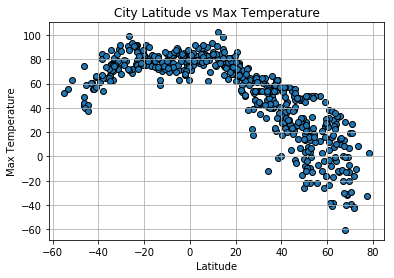

In [11]:
# Generate Title, x and y labels
plt.title("City Latitude vs Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")

# Generate the Plot
plt.scatter(lat, temp_max, marker="o", edgecolors="black")

#Create the grid
plt.grid(True)

# Save the Figure
plt.savefig("images/CityLatitudeVSMaxTemperature.png")

# Show the Figure
plt.show()

#### Latitude vs. Humidity Plot

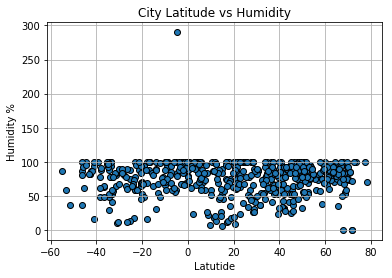

In [12]:
# Generate Title, x and y labels
plt.title("City Latitude vs Humidity")
plt.xlabel("Latutide")
plt.ylabel("Humidity %")

# Generate the Plot
plt.scatter(lat, humidity, marker="o",edgecolors="black")

#Create the grid
plt.grid(True)

# Save the Figure
plt.savefig("images/CityLatitudeVSHumidity.png")

# Show the Figure
plt.show()

#### Latitude vs. Cloudiness Plot

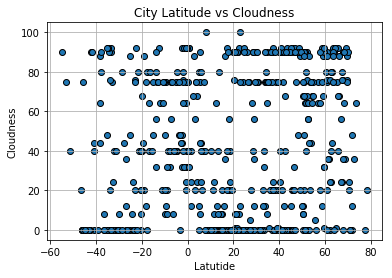

In [13]:
# Generate Title, x and y labels
plt.title("City Latitude vs Cloudness")
plt.xlabel("Latutide")
plt.ylabel("Cloudness")

#Generate the plot
plt.scatter(lat, cloudiness, marker="o", edgecolors="black")

#Create the grid
plt.grid(True)

# Save the Figure
plt.savefig("images/CityLatitudeVSCloudness.png")

# Show the Figure
plt.show()

#### Latitude vs. Wind Speed Plot

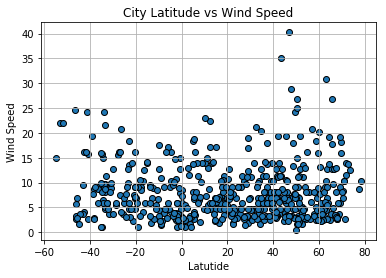

In [14]:

# Generate Title, x and y labels
plt.title("City Latitude vs Wind Speed")
plt.xlabel("Latutide")
plt.ylabel("Wind Speed")

#Generate the plot
plt.scatter(lat, wind_speed, marker="o", edgecolors="black")

#Create the grid
plt.grid(True)

# Save the Figure
plt.savefig("images/CityLatitudeVSWindSpeed.png")

# Show the Figure
plt.show()